In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

**1. Importer le jeu de données "titanic.csv" dans un dataframe. Ensuite, afficher les cinq premières
lignes.**

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Calculer le nombre des valeurs manquantes de la colonne "Cabin".**

In [ ]:
df['Cabin'].isnull().sum()

687

**3. Calculer la somme des valeurs manquantes de toutes les colonnes du DataFrame.**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum().sum()

866

**4.
a. 70 % des données de la colonne "Cabin" sont manquantes. Supprimer la colonne "Cabin".**

In [ ]:
df.drop(['Cabin'],axis=1 ,inplace=True)
# other method
# df.drop(columns=['Cabin'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**4.b. Seulement deux passagers n’ont pas d’informations sur le port d’embarquement. Supprimer ces
deux passagers.**

In [ ]:
df.dropna(subset=['Embarked'], how='all', inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

**4.c. Remplir les âges manquants avec la valeur médiane de cette colonne.**

In [ ]:
med = int(df['Age'].median())
df['Age'] = df['Age'].fillna(med)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**5. Calculer le pourcentage des hommes et des femmes montés sur Titanic.**

In [ ]:
round (df[df['Sex']=="male"].shape[0] / df.shape[0] * 100 , 2)


64.9

In [ ]:
round (df[df['Sex']=="female"].shape[0] / df.shape[0] * 100 , 2)

35.1

**6. Calculer l’âge moyen pour chaque sexe.**

In [ ]:
male = df[df['Sex']=="male"]
int(male['Age'].mean())

30

In [ ]:
female = df[df['Sex']=="female"]
int(female['Age'].mean())

27

**7. Déterminer l’histogramme représentant la répartition par âge des passagers.**

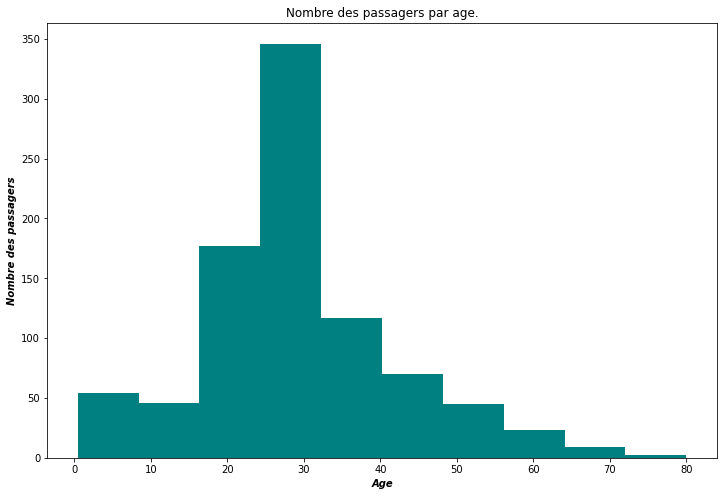

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Nombre des passagers par age.', loc ='center', color='black')
plt.xlabel("Age" , fontweight='bold', fontstyle='italic')
plt.ylabel("Nombre des passagers" , fontweight='bold', fontstyle='italic')

plt.hist(df['Age'],color="teal")
plt.show() 

In [ ]:
df[(df['Age']>25)&(df['Age']<34)].shape[0]

339

**8. Calculer le taux de survie moyen pour tous les passagers.**

In [ ]:
round(df[df['Survived']==1].shape[0]/df.shape[0]*100 , 2)

38.25

**9. Calculer ce taux de survie pour tous les passagers âgés moins de 25 ans.**

In [ ]:
round(df[(df['Survived']==1) & (df['Age']<25)].shape[0]/df.shape[0]*100,2)

13.27

**10. Calculer le nombre de passagers âgés plus de 70 ans se trouvaient à bord du Titanic.**

In [ ]:
len(df[df['Age']>70])

5

**11. Afficher les informations des passagers (Sexe, Age, Survived) dont le type d’embarquement est C.**

In [ ]:
print(len(df[df['Embarked']=='C'][['Embarked','Sex','Age','Survived']]))
df[df['Embarked']=='C'][['Embarked','Sex','Age','Survived']]

168


,Embarked,Sex,Age,Survived
1,C,female,38.0,1
9,C,female,14.0,1
19,C,female,28.0,1
26,C,male,28.0,0
30,C,male,40.0,0
...,...,...,...,...
866,C,female,27.0,1
874,C,female,28.0,1
875,C,female,15.0,1
879,C,female,56.0,1


**12. Calculer le nombre des enfants morts âgés moins de 15 ans.**

In [ ]:
len(df[(df['Survived']==0) & (df['Age']<15)])
# or
df[(df['Survived']==0) & (df['Age']<15)].shape[0]

33

**13. Afficher les garçons vivants âgés moins de 15 ans.**

In [ ]:
df[(df['Survived']==1) & (df['Age']<15)& (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,S
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,S


**14. Afficher les informations (Name, Pclass, SibSp) des enfants vivants âgés moins de 15 ans.**

In [ ]:
df[(df['Survived']==1) & (df['Age']<15)][['Name','Pclass','SibSp']]

,Name,Pclass,SibSp
9,"Nasser, Mrs. Nicholas (Adele Achem)",2,1
10,"Sandstrom, Miss. Marguerite Rut",3,1
39,"Nicola-Yarred, Miss. Jamila",3,1
43,"Laroche, Miss. Simonne Marie Anne Andree",2,1
58,"West, Miss. Constance Mirium",2,1
78,"Caldwell, Master. Alden Gates",2,0
125,"Nicola-Yarred, Master. Elias",3,1
165,"Goldsmith, Master. Frank John William ""Frankie""",3,0
172,"Johnson, Miss. Eleanor Ileen",3,1
183,"Becker, Master. Richard F",2,2


**15. Déterminer l’histogramme représentant la répartition par tarif des passagers.**

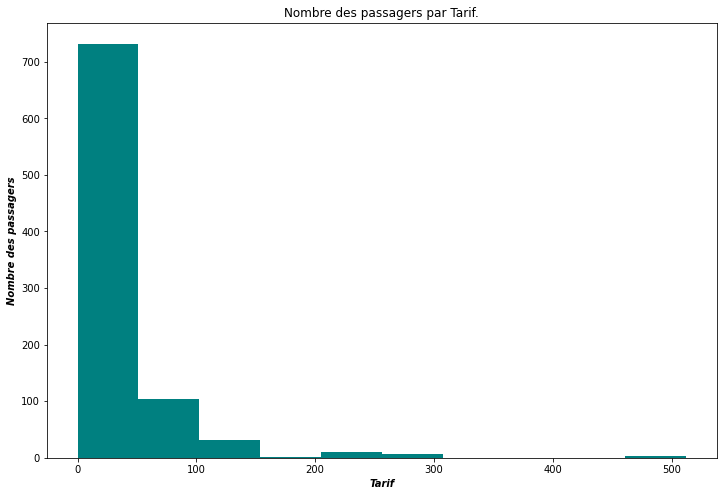

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Nombre des passagers par Tarif.', loc ='center', color='black')
plt.xlabel("Tarif" , fontweight='bold', fontstyle='italic')
plt.ylabel("Nombre des passagers" , fontweight='bold', fontstyle='italic')

plt.hist(df['Fare'] ,color="teal")
plt.show() 

**16. Afficher les passagers dont le tarif est inférieur à 100 et qui sont des femmes.**

In [ ]:
df[(df['Fare']<100) & (df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


**17. Afficher les passagers dont le tarif est supérieur à 500 ou âgés plus de 70 ans.**

In [ ]:
df[(df['Fare']>500) | (df['Age']>70)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


**18. Afficher les informations des passagers dont ils ont payé les 10 tarifs les plus élevés.**

In [ ]:
df.sort_values(by=['Fare'],ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C


**19. Déterminer un graphique en bâton pour visualiser le taux des vivants moyen par classe.**

In [ ]:
from numpy.ma.core import sort
dfsurvived = df[(df['Survived']==1)]
classUnique = sort(df['Pclass'].unique())
nbByClass = []
for c in classUnique:
  nbByClass.append(len(dfsurvived[dfsurvived['Pclass']==c]))

print(classUnique)
print(nbByClass)



[1 2 3]
[134, 87, 119]


Text(0, 0.5, 'Nombre des vivants')

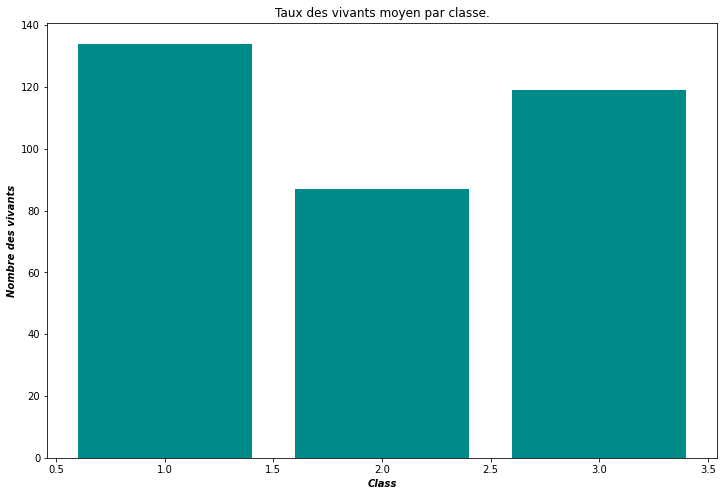

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(classUnique, nbByClass, color='darkcyan' )
plt.title('Taux des vivants moyen par classe.', loc ='center', color='black')
plt.xlabel("Class" , fontweight='bold', fontstyle='italic')
plt.ylabel("Nombre des vivants" , fontweight='bold', fontstyle='italic')

**20. Déterminer un graphique en bâton pour visualiser le tarif moyen payé par les personnes en fonction
de leur âge. La colonne d’âge est divisée en des classes distinctes.**

In [ ]:
dfenfant = df[(df['Age']<15)]
dfjeune = df[(df['Age']>=15)&(df['Age']<25)]
dfage = df[(df['Age']>=25)&(df['Age']<60)]
dfvieil = df[(df['Age']>=60)]

In [ ]:
from numpy.core.fromnumeric import mean
tarifMoyEnfant = mean(dfenfant['Fare'])
tarifMoyJeune = mean(dfjeune['Fare'])
tarifMoyAge = mean(dfage['Fare'])
tarifMoyVieil = mean(dfvieil['Fare'])

listTarif = [tarifMoyEnfant,tarifMoyJeune,tarifMoyAge,tarifMoyVieil]
listCategoryAge = ['enfant','jeune','age' ,'vieil']

print (listCategoryAge)
print (listTarif)

['enfant', 'jeune', 'age', 'vieil']
[31.704434615384628, 31.002395000000007, 32.09958651877128, 42.006668]


Text(0, 0.5, 'Tarif')

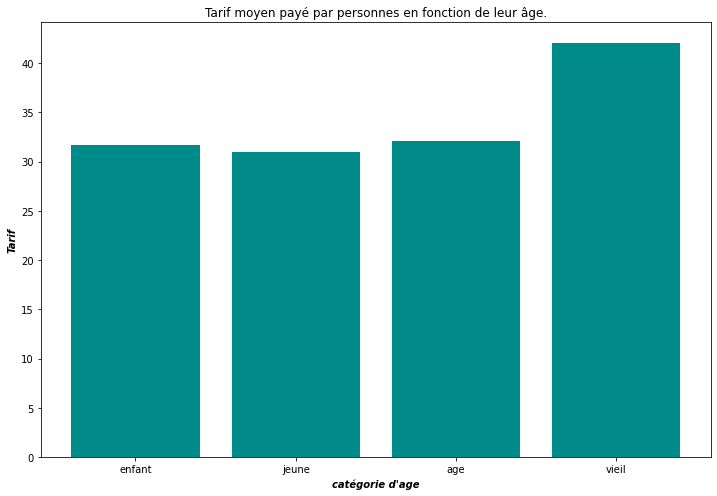

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(listCategoryAge , listTarif, color='darkcyan' )
plt.title('Tarif moyen payé par personnes en fonction de leur âge.', loc ='center', color='black')
plt.xlabel("catégorie d'age" , fontweight='bold', fontstyle='italic')
plt.ylabel("Tarif" , fontweight='bold', fontstyle='italic')